<a href="https://colab.research.google.com/github/jefersonmatsui/Data_Science_com_Python_Modal_Mais/blob/main/M3A1_Filtro_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Módulo 3 - Manipulação de Dados com Python**

O objetivo deste módulo é dar início ao processo de transformação e processamento de dados, para deixar no formato que precisamos antes de realizar a análise. Além disso, mostraremos como filtrar, modificar e juntar diferentes tipos de dados.

## 1. Bibliotecas

Dando continuidade ao que aprendemos no módulo anterior, neste módulo continuaremos explorando todo o potencial da biblioteca pandas.

Esta é a biblioteca de referência que devemos usar quando há necessidade de processamento e tratamento de dados.

Além disso, vamos mostrar alguns procedimentos que podemos realizar com dados, utilizando para isso dados financeiros como exemplo.

In [6]:
# Execute apenas se for preciso instalar as bibliotecas

!pip install pandas numpy
!pip install datetime
!pip install matplotlib plotly
!pip install yfinance quandl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Importação de dados financeiros
import yfinance as yf
import quandl

## 2. Criar e organizar um dataframe

### 2.1. Dataframe simples, uma coluna

Vamos utilizara API da Quandl (Nasdaq) que já vimos anteriormente para fazer a extração dos dados da Selic

In [31]:
# Inserir a chave de API

quandl.ApiConfig.api_key = 'FCsohc761nXP2p31xyzb'

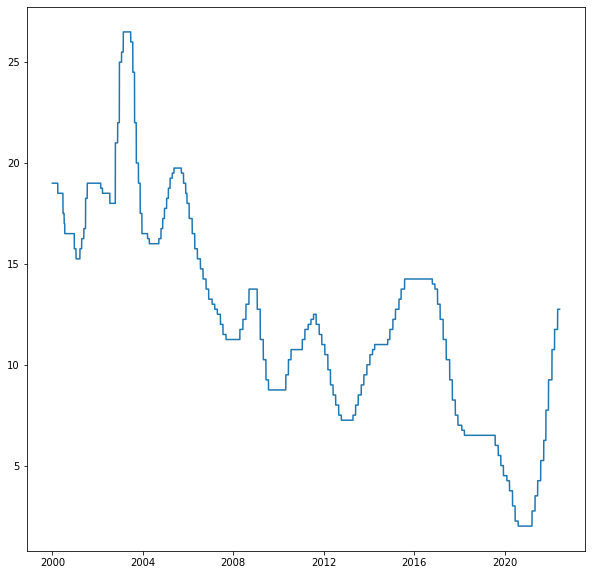

In [32]:
# Os códigos referentes a cada papel / moeda / taxa de juros podem ser obtidos na busca do proprio site da Quandl
# Nesse caso, a selic é representada por BCB/432

selic = quandl.get('BCB/432', start_date = '2000-01-01', end_date = '2022-12-31');

plt.figure(figsize = (10,10))
plt.plot(selic)
plt.show()

In [33]:
# Vamos inspecionar o formato dos dados

selic.head()

,Value
Date,
2000-01-01,19.0
2000-01-02,19.0
2000-01-03,19.0
2000-01-04,19.0
2000-01-05,19.0


Observe a estrutura do data frame acima. Perceba que ele possui apenas uma coluna e um índice (data). Data frames assim são fáceis de trabalhar pois as tarefas realizadas nele são automaticamente aplicadas a sua única coluna, portanto não é necessário mencionar o nome desta única coluna.

Os dataframes lembram muito os nossos conhecidos arquivos de planilha como Excel ou Google Sheets

### 2.2. Filtros simples

Imagine que você trabalha num banco e agora lhe foi dada a tarefa de selecionar um valor de Selic para um dia específico. Como você poderia fazer?

É para resolver problemas assim que existem os métodos .loc e .iloc. Como eles funcionam?

A ideia desses métodos é de possibilitar um filtro nos nossos dados para obter uma linha ou célula específicas.

#### 2.2.1. O método .loc

O .loc é utilizado quando o filtro deve ser feito com a métrica utilizada no índice do nosso dataframe.

Por exemplo, a métrica utilizada como índice no nosso dataframe é data. Portanto, nesse caso devemos usar o .loc com a data que queremos fazer o filtro.

Imagine que o seu gestor te perguntou qual era o valor da Selic no dia 26/05/21

Você poderia ter feito assim:

In [34]:
selic_filtrada = selic.loc['2021-05-26']
selic_filtrada

Value    3.5
Name: 2021-05-26 00:00:00, dtype: float64

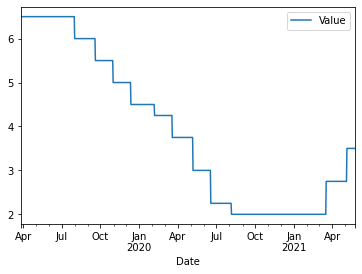

In [35]:
# Para obter os dados entre duas datas específicas

selic_filtrada = selic.loc['2019-03-26':'2021-05-26']
selic_filtrada.plot()

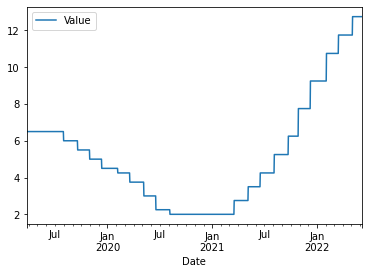

In [36]:
# Filtrando a partir de uma data específica e indo até o último dia disponível

selic_filtrada = selic.loc['2019-03-26':]
selic_filtrada.plot()

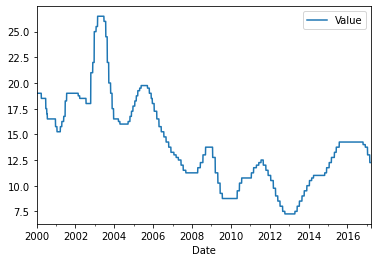

In [37]:
# Obtendo os dados desde o início e indo até uma data limite específica, nesse caso 26/03/2017

selic_filtrada = selic.loc[:'2017-03-26']
selic_filtrada.plot()

#### 2.2.2. O método .iloc

O .iloc é utilizado quando o filtro deve ser feito com a posição da linha dentro do nosso dataframe.

Por exemplo, caso você precise da linha 0 ou linha 1. Ou mesmo se precisar da linha 200 até a linha 500.

Exemplos:

In [40]:
# Obtendo a linha 0 (primeira linha, excluindo o cabeçalho)

selic_filtrada = selic.iloc[0]
selic_filtrada

Value    19.0
Name: 2000-01-01 00:00:00, dtype: float64

In [41]:
# Obtendo a linha 1 (lembrar sempre da indexação iniciado em 0 em Python)

selic_filtrada = selic.iloc[1]
selic_filtrada

Value    19.0
Name: 2000-01-02 00:00:00, dtype: float64

In [42]:
# Obtendo a linha 200

selic_filtrada = selic.iloc[200]
selic_filtrada

Value    17.0
Name: 2000-07-19 00:00:00, dtype: float64

In [43]:
# Obtendo a última linha

selic_filtrada = selic.iloc[-1]
selic_filtrada

Value    12.75
Name: 2022-06-06 00:00:00, dtype: float64

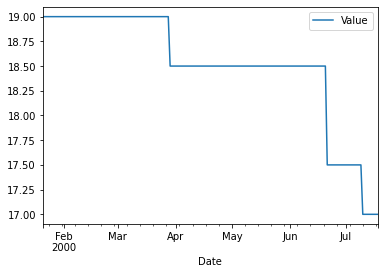

In [45]:
# Obtendo da linha 20 até a linha 200 (lembrandp também da indexação, 200 não inclusiva)

selic_filtrada = selic.iloc[20:200]
selic_filtrada.plot()

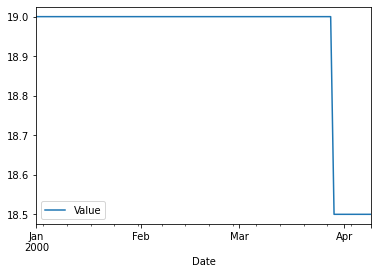

In [47]:
# Obtendo todas as linhas até a linha 100 (linha 100 não entra)

selic_filtrada = selic.iloc[:100]
selic_filtrada.plot()

### 2.3. Noções importantes de dataframes

Para demonstrar manipulações de dados em um dataframe de várias colunas, vamos extrair os dados das ações que compõem o IBOV

Para saber a composição atualizada do IBOV, acesse o link: https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm

Nesta seção, vamos utilizar algumas bibliotecas de dados de mercado financeiro, como a yfinance, que extrai dados do Yahoo Finance

Os ativos que compõem o IBOV são os seguintes:

['WEGE3', 'EMBR3', 'AZUL4', 'CCRO3', 'ECOR3', 'GOLL4', 'RAIL3', 'POSI3', 'BRFS3', 'JBSS3', 'MRFG3', 'BEEF3', 'ABEV3', 'ASAI3', 'CRFB3', 'PCAR3', 'NTCO3', 'AMER3', 'SOMA3', 'LREN3', 'MGLU3', 'PETZ3', 'VIIA3', 'ALPA4', 'CYRE3', 'EZTC3', 'JHSF3', 'MRVE3', 'CVCB3', 'COGN3', 'RENT3', 'LCAM3', 'YDUQ3', 'BRML3', 'IGTI11', 'MULT3', 'BIDI11', 'BPAN4', 'BBDC3', 'BBDC4', 'BBAS3', 'BPAC11', 'ITSA4', 'ITUB4', 'SANB11', 'BBSE3', 'IRBR3', 'SULA11', 'B3SA3', 'CIEL3', 'DXCO3', 'KLBN11', 'SUZB3', 'BRAP4', 'CMIN3', 'VALE3', 'BRKM5', 'GGBR4', 'GOAU4', 'CSNA3', 'USIM5', 'RRRP3', 'CSAN3', 'PETR3', 'PETR4', 'PRIO3', 'UGPA3', 'VBBR3', 'HYPE3', 'RADL3', 'FLRY3', 'HAPV3', 'GNDI3', 'QUAL3', 'RDOR3', 'LWSA3', 'CASH3', 'TOTS3', 'VIVT3', 'TIMS3', 'SBSP3', 'CMIG4', 'CPLE6', 'CPFE3', 'ELET3', 'ELET6', 'ENBR3', 'ENGI11', 'ENEV3', 'EGIE3', 'EQTL3', 'TAEE11']

Vamos transformar isso agora numa lista

In [48]:
tickers_IBOV = ['WEGE3', 'EMBR3', 'AZUL4', 'CCRO3', 'ECOR3', 'GOLL4', 'RAIL3', 'POSI3', 'BRFS3', 'JBSS3', 'MRFG3', 'BEEF3', 'ABEV3', 'ASAI3', 'CRFB3', 'PCAR3', 'NTCO3', 'AMER3', 'SOMA3', 'LREN3', 'MGLU3', 'PETZ3', 'VIIA3', 'ALPA4', 'CYRE3', 'EZTC3', 'JHSF3', 'MRVE3', 'CVCB3', 'COGN3', 'RENT3', 'LCAM3', 'YDUQ3', 'BRML3', 'IGTI11', 'MULT3', 'BIDI11', 'BPAN4', 'BBDC3', 'BBDC4', 'BBAS3', 'BPAC11', 'ITSA4', 'ITUB4', 'SANB11', 'BBSE3', 'IRBR3', 'SULA11', 'B3SA3', 'CIEL3', 'DXCO3', 'KLBN11', 'SUZB3', 'BRAP4', 'CMIN3', 'VALE3', 'BRKM5', 'GGBR4', 'GOAU4', 'CSNA3', 'USIM5', 'RRRP3', 'CSAN3', 'PETR3', 'PETR4', 'PRIO3', 'UGPA3', 'VBBR3', 'HYPE3', 'RADL3', 'FLRY3', 'HAPV3', 'GNDI3', 'QUAL3', 'RDOR3', 'LWSA3', 'CASH3', 'TOTS3', 'VIVT3', 'TIMS3', 'SBSP3', 'CMIG4', 'CPLE6', 'CPFE3', 'ELET3', 'ELET6', 'ENBR3', 'ENGI11', 'ENEV3', 'EGIE3', 'EQTL3', 'TAEE11']

In [49]:
# Como ordenar esses papéis em ordem alfabética?

tickers_IBOV.sort()
tickers_IBOV

['ABEV3',
 'ALPA4',
 'AMER3',
 'ASAI3',
 'AZUL4',
 'B3SA3',
 'BBAS3',
 'BBDC3',
 'BBDC4',
 'BBSE3',
 'BEEF3',
 'BIDI11',
 'BPAC11',
 'BPAN4',
 'BRAP4',
 'BRFS3',
 'BRKM5',
 'BRML3',
 'CASH3',
 'CCRO3',
 'CIEL3',
 'CMIG4',
 'CMIN3',
 'COGN3',
 'CPFE3',
 'CPLE6',
 'CRFB3',
 'CSAN3',
 'CSNA3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'ECOR3',
 'EGIE3',
 'ELET3',
 'ELET6',
 'EMBR3',
 'ENBR3',
 'ENEV3',
 'ENGI11',
 'EQTL3',
 'EZTC3',
 'FLRY3',
 'GGBR4',
 'GNDI3',
 'GOAU4',
 'GOLL4',
 'HAPV3',
 'HYPE3',
 'IGTI11',
 'IRBR3',
 'ITSA4',
 'ITUB4',
 'JBSS3',
 'JHSF3',
 'KLBN11',
 'LCAM3',
 'LREN3',
 'LWSA3',
 'MGLU3',
 'MRFG3',
 'MRVE3',
 'MULT3',
 'NTCO3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'PETZ3',
 'POSI3',
 'PRIO3',
 'QUAL3',
 'RADL3',
 'RAIL3',
 'RDOR3',
 'RENT3',
 'RRRP3',
 'SANB11',
 'SBSP3',
 'SOMA3',
 'SULA11',
 'SUZB3',
 'TAEE11',
 'TIMS3',
 'TOTS3',
 'UGPA3',
 'USIM5',
 'VALE3',
 'VBBR3',
 'VIIA3',
 'VIVT3',
 'WEGE3',
 'YDUQ3']

**PONTO IMPORTANTE**

As ações brasileiras no Yahoo Finance terminam com ".SA". Isso é válido inclusive para outros papéis, como ETFs, FIIs, BDRs

Como acrescentar ".SA" ao fim do nome de um papel?

Veja o raciocínio abaixo:

In [50]:
acao = 'PETR4'

acao + ".SA"

# Observe que "somamos" o ".SA" ao ticker de "PETR4"

'PETR4.SA'

Precisamos então criar uma estrutura que faça isso para todos os papéis de uma vez

In [51]:
aivos_SA = 0
tickers_IBOV_SA = []

for i in tickers_IBOV:
  ativos_SA = (i + '.SA')
  tickers_IBOV_SA.append(ativos_SA)

tickers_IBOV_SA

['ABEV3.SA',
 'ALPA4.SA',
 'AMER3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BIDI11.SA',
 'BPAC11.SA',
 'BPAN4.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GNDI3.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'JHSF3.SA',
 'KLBN11.SA',
 'LCAM3.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RDOR3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SANB1

Uma vez que temos uma lista com o nome dos tickers corrigidos para fazer a busca na yfinance (que extrai os dados da Yahoo Finance)

In [52]:
# Extração para um ativo

yf.download("PETR4.SA", start='2022-02-01', end='2022-02-18', period = "1d")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,32.349998,33.320000,31.950001,33.000000,27.068611,57315200
2022-02-02,33.410000,33.490002,32.360001,32.520000,26.674887,36271700
2022-02-03,32.349998,32.919998,31.620001,32.070000,26.305767,51087800
2022-02-04,32.410000,33.230000,31.879999,32.630001,26.765116,59346800
2022-02-07,32.549999,32.779999,32.130001,32.150002,26.371389,48868100
2022-02-08,31.900000,31.950001,31.260000,31.830000,26.108906,62590000
2022-02-09,31.740000,32.689999,31.650000,31.950001,26.207338,50960500
2022-02-10,32.299999,32.900002,31.940001,32.439999,26.609264,49534600
2022-02-11,32.770000,33.910000,32.630001,33.759998,27.692007,88013400


Observe a estrutura dos dados acima. Temos Abertura, Máxima, Mínima, Fechamento, Fechamento Ajustado e Volume. Podemos reproduzir a mesma estrutura caso queiramos obter dados de vários papéis ao mesmo tempo.


In [53]:
# Na yfinance as vezes pode ocorrer erros na busca de alguns ativos (usualmente se for uma unit). Note que nesse caso houve um erro em BIDI11
# Pode ver que é um problema pontual https://finance.yahoo.com/quote/BIDI11.SA/history?p=BIDI11.SA

yf.download(tickers_IBOV_SA, start = '2022-02-01', end = '2022-02-18', period = '1d')

[*********************100%***********************]  92 of 92 completed

2 Failed downloads:
- BIDI11.SA: No data found for this date range, symbol may be delisted
- GNDI3.SA: No data found, symbol may be delisted


Adj Close                                                         \
            ABEV3.SA   ALPA4.SA   AMER3.SA   ASAI3.SA   AZUL4.SA   B3SA3.SA   
Date                                                                          
2022-02-01     14.85  27.070000  31.090000  12.478713  28.820000  14.086241   
2022-02-02     14.52  26.420000  31.209999  12.399358  27.650000  13.957825   
2022-02-03     14.46  25.920000  32.000000  12.399358  27.330000  13.967703   
2022-02-04     14.41  25.830000  32.150002  12.796137  26.370001  13.957825   
2022-02-07     14.29  25.959999  32.200001  12.667184  26.260000  13.533064   
2022-02-08     14.16  26.440001  33.270000  12.409277  26.410000  13.384892   
2022-02-09     14.54  26.840000  34.029999  12.508471  28.110001  13.987459   
2022-02-10     14.75  26.600000  33.950001  12.577909  28.620001  13.928190   
2022-02-11     14.86  27.090000  32.540001  12.240646  26.950001  13.750383   
2022-02-14     15.06  27.299999  33.720001  12.230726  26.990000  13.947947   
2022-02-15     15.38  28.020000  35.860001  12.081934  29.270000  14.422098   
2022-02-16     15.08  27.090000  35.439999  12.944929  29.290001  14.412220   
2022-02-17     14.85  26.799999  34.279999  13.143319  28.780001  14.026972   

                                                        ...    Volume  \
             BBAS3.SA   BBDC3.SA   BBDC4.SA   BBSE3.SA  ...  TIMS3.SA   
Date                                                    ...             
2022-02-01  31.519228  16.986320  20.684196  22.208441  ...   8627700   
2022-02-02  30.997290  16.703482  20.312307  21.929512  ...   3630000   
2022-02-03  31.209932  16.938616  20.610884  22.054550  ...   6519300   
2022-02-04  31.151939  16.974794  20.746603  21.958366  ...   3370700   
2022-02-07  30.794315  17.001921  20.674219  23.218351  ...  10904600   
2022-02-08  31.122942  17.065226  20.556597  23.179880  ...   6965300   
2022-02-09  30.852308  15.563993  18.792280  23.343390  ...  29046800   
2022-02-10  31.190599  15.690602  19.063711  23.429953  ...   8989100   
2022-02-11  32.282806  15.853387  19.127045  22.760000  ...   7409300   
2022-02-14  32.418121  15.970954  19.154192  23.370001  ...   6602900   
2022-02-15  33.954937  16.151823  19.172287  23.139999  ...   4562700   
2022-02-16  34.148251  16.287479  19.398481  23.080000  ...   4051700   
2022-02-17  34.148251  16.124695  19.172287  23.170000  ...   3886000   

                                                                       \
            TOTS3.SA UGPA3.SA  USIM5.SA  VALE3.SA  VBBR3.SA  VIIA3.SA   
Date                                                                    
2022-02-01   6024600  4031300  22618500  24131300   5671500  61176300   
2022-02-02   4367600  5389400  13505200  17489000   3963900  51646000   
2022-02-03   2745300  6936700  20575800  19179400   7868700  56051800   
2022-02-04   3566100  5738300  14148800  24535400  10097900  52345500   
2022-02-07   5266900  5707100  21626800  24915800   5616200  57982300   
2022-02-08   3898100  6809800  14037400  26598600   4750000  40448200   
2022-02-09   3396200  5287400  14784800  24815300   8016900  48640900   
2022-02-10   4983300  5188100  25220700  47888900   7723700  88372900   
2022-02-11   5154800  7125100  66203500  34555300   8110900  73340800   
2022-02-14   4514100  4354600  23686600  22804400   7618600  56300300   
2022-02-15   6855400  5731500  28728900  29624900  10902900  36145600   
2022-02-16   6116000  8601000  20383200  20774700  19215900  45592600   
2022-02-17  14125600  5515000  29080100  36259300  12474100  60121500   

                                        
           VIVT3.SA  WEGE3.SA YDUQ3.SA  
Date                                    
2022-02-01  1418200   4459400  4126200  
2022-02-02  1399500   4925100  2286400  
2022-02-03  1269200   5506300  3588300  
2022-02-04  1246900   5170800  2392300  
2022-02-07  1712600   5010100  6908800  
2022-02-08  1925000   6430500  4598900  
2022-02-09  2642500   5009700  1932100 

Perceba que a estrutura acima replica as 5 colunas (Abertura, Máxima, Mínima, Fechamento, Fechamento Ajustado e Volume) para todos os papéis. Isso cria uma estrutura muito grande e difícil de trabalhar. É melhor selecionar apenas uma coluna específica para esses papéis:

In [54]:
# Nesse caso, estamos não apenas extraindo os dados, mas armazenando na variável cotacoes_IBOV

cotacoes_IBOV = yf.download(tickers_IBOV_SA, start='2022-02-10', end='2022-02-18', period = "1d")

[*********************100%***********************]  92 of 92 completed

2 Failed downloads:
- BIDI11.SA: No data found for this date range, symbol may be delisted
- GNDI3.SA: No data found, symbol may be delisted


Para facilitar nossa vida, podemos obter apenas os dados da coluna Adj Close para todos os papéis de uma vez

In [55]:
yf.download(tickers_IBOV_SA, start='2022-02-10', end='2022-02-18', period = "1d")['Adj Close']

[*********************100%***********************]  92 of 92 completed

2 Failed downloads:
- BIDI11.SA: No data found for this date range, symbol may be delisted
- GNDI3.SA: No data found, symbol may be delisted


,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-10,14.75,26.600000,33.950001,12.577909,28.620001,13.928190,31.190599,15.690602,19.063711,23.429953,...,13.879147,27.700001,13.903831,15.920329,90.394722,22.717138,4.34,48.140499,29.502254,21.527210
2022-02-11,14.86,27.090000,32.540001,12.240646,26.950001,13.750383,32.282803,15.853387,19.127048,22.760000,...,13.819494,27.629999,13.922996,14.734368,88.565063,22.727085,4.12,48.392952,29.293934,21.060738
2022-02-14,15.06,27.299999,33.720001,12.230726,26.990000,13.947947,32.418121,15.970955,19.154190,23.370001,...,13.799610,28.670000,14.009236,14.876684,88.179871,22.945900,4.02,48.383244,30.196659,21.626461
2022-02-15,15.38,28.020000,35.860001,12.081934,29.270000,14.422098,33.954937,16.151825,19.172285,23.139999,...,13.759842,30.219999,14.497931,14.791294,85.560570,23.492943,4.12,47.577343,32.617157,22.757904
2022-02-16,15.08,27.090000,35.439999,12.944929,29.290001,14.412220,34.148251,16.287477,19.398481,23.080000,...,13.739957,30.450001,15.139940,14.696417,86.186508,24.318478,4.15,47.858921,31.049784,22.182257
2022-02-17,14.85,26.799999,34.279999,13.143319,28.780001,14.026972,34.148251,16.124693,19.172285,23.170000,...,13.700189,32.220001,14.862056,14.098693,82.479050,24.010143,4.01,48.305561,30.404980,21.844809


Perceba que reduzimos o número de colunas de 552 para 92 (Adj Close dos 92 ativos da lista)

Vamos criar um novo dataframe com o resultado da busca de cotação ao longo de todo o período de 2021, considerando todos as colunas disponíveis (OHLC, Adj Close e Volume)

In [56]:
cotacao_IBOV = yf.download(tickers_IBOV_SA, start = '2021-01-01', end = '2021-12-31', period = '1d')

[*********************100%***********************]  92 of 92 completed

1 Failed download:
- GNDI3.SA: No data found, symbol may be delisted


In [57]:
# Reforçando a complexidade do dateframe, composto por pois índices de colunas
# Indice 0 para os parâmetros das cotações e índice 1 para os ativos

cotacao_IBOV.columns

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ALPA4.SA'),
            ('Adj Close', 'AMER3.SA'),
            ('Adj Close', 'ASAI3.SA'),
            ('Adj Close', 'AZUL4.SA'),
            ('Adj Close', 'B3SA3.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ('Adj Close', 'BBSE3.SA'),
            ...
            (   'Volume', 'TIMS3.SA'),
            (   'Volume', 'TOTS3.SA'),
            (   'Volume', 'UGPA3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE3.SA'),
            (   'Volume', 'VBBR3.SA'),
            (   'Volume', 'VIIA3.SA'),
            (   'Volume', 'VIVT3.SA'),
            (   'Volume', 'WEGE3.SA'),
            (   'Volume', 'YDUQ3.SA')],
           length=552)

In [58]:
# Usando o set (conjunto) podemos remover as duplicatas e ver a lista de parâmetros disponíveis

set(cotacao_IBOV.columns.get_level_values(0))

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

In [59]:
# Filtrar apenas o índice que contém os preços de Adj Close

cotacoes_IBOV_Adj_Close = cotacoes_IBOV['Adj Close']
cotacoes_IBOV_Adj_Close

,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-10,14.75,26.600000,33.950001,12.577909,28.620001,13.928190,31.190599,15.690603,19.063711,23.429953,...,13.879147,27.700001,13.903831,15.920329,90.394722,22.717138,4.34,48.140499,29.502254,21.527210
2022-02-11,14.86,27.090000,32.540001,12.240646,26.950001,13.750383,32.282803,15.853388,19.127048,22.760000,...,13.819494,27.629999,13.922996,14.734368,88.565063,22.727085,4.12,48.392948,29.293934,21.060738
2022-02-14,15.06,27.299999,33.720001,12.230726,26.990000,13.947947,32.418121,15.970955,19.154190,23.370001,...,13.799610,28.670000,14.009235,14.876684,88.179871,22.945900,4.02,48.383244,30.196659,21.626461
2022-02-15,15.38,28.020000,35.860001,12.081934,29.270000,14.422098,33.954937,16.151825,19.172285,23.139999,...,13.759842,30.219999,14.497931,14.791294,85.560570,23.492943,4.12,47.577339,32.617157,22.757904
2022-02-16,15.08,27.090000,35.439999,12.944929,29.290001,14.412220,34.148251,16.287477,19.398481,23.080000,...,13.739957,30.450001,15.139941,14.696417,86.186508,24.318478,4.15,47.858921,31.049784,22.182257
2022-02-17,14.85,26.799999,34.279999,13.143319,28.780001,14.026972,34.148251,16.124695,19.172285,23.170000,...,13.700189,32.220001,14.862056,14.098693,82.479050,24.010143,4.01,48.305561,30.404980,21.844809


In [60]:
# Filtrar apenas o índice que contém os preços de Adj Close e ABEV3.SA ao mesmo tempo (acaba sendo uma única coluna)
# Como é apenas uma coluna, ele desconsidera o formato dateframe e traz como um formato "series" da biblioteca pandas
# Usando pd.DataFrame podemos reconfigurar como dataframe

cotacoes_IBOV_Adj_Close_ABEV3 = cotacoes_IBOV[('Adj Close','ABEV3.SA')]
cotacoes_IBOV_Adj_Close_ABEV3 = pd.DataFrame(cotacoes_IBOV_Adj_Close_ABEV3)
cotacoes_IBOV_Adj_Close_ABEV3

,Adj Close
,ABEV3.SA
Date,
2022-02-10,14.75
2022-02-11,14.86
2022-02-14,15.06
2022-02-15,15.38
2022-02-16,15.08
2022-02-17,14.85
